![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Interpolación - Tercera Parte

***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*

In [1]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos
import matplotlib.pyplot as plt #librería para graficar

#Cargo los datos

datan=pd.read_table('data.csv', sep=',', header=0)
dfn = pd.DataFrame(datan)
dfn

,x,y
0,0,0.500
1,1,0.933
2,2,0.067
3,3,0.500
4,4,0.933
5,5,0.067
6,6,0.500
7,7,0.933
8,8,0.067
9,9,0.500


C:\Users\micae\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
C:\Users\micae\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


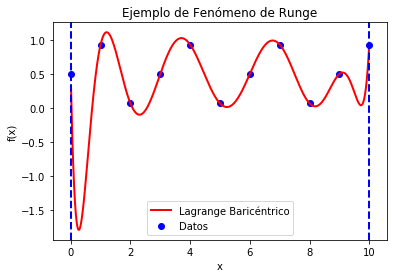

In [2]:
def LagrangeBaricentricoPlot (df,x):
    N=len(df)
    W=np.zeros(N)
    P=0
    L=1
    PB=0
    for i in range (0,N):
        if x==df['y'][i]:         #Para que no divida por cero .
            return df['y'][i]
        L*=x-df['x'][i]
        w=1
        for j in range (0,N):
            if j != i:
                 w*=1/(df['x'][i]-df['x'][j])
        W[i]=w
        P+=(w*df['y'][i])/(x-df['x'][i])
    PB=L*P
    return PB

import matplotlib.pyplot as plt

plt.xlabel('x')
plt.ylabel('f(x)')

ejex = np.linspace(min(dfn['x'])*0.9, max(dfn['x'])*1,num=1000)
Nx=len(ejex)
y_pl=np.zeros(Nx)
y_plb=np.zeros(Nx)

for i in range(0,Nx):
    y_plb[i] = LagrangeBaricentricoPlot(dfn,ejex[i]);
    
plt.plot(ejex, y_plb, linewidth=2, color = 'red')
plt.scatter(dfn['x'], dfn['y'], color = 'blue')
plt.legend(['Lagrange Baricéntrico','Datos','limite','dato'],fontsize=10)
plt.axvline(min(dfn['x']), linewidth=2, color='blue',linestyle='dashed')
plt.axvline(max(dfn['x']), linewidth=2, color='blue',linestyle='dashed')
plt.title('Ejemplo de Fenómeno de Runge');

### Fenómeno de Runge
___

Podemos decir que la interpolación polinómica no resulta muy confiable para estimar o aproximar valores en los extremos, con lo cual pierde efectividad. Estas oscilaciones que aparecen en los
polinomios de mayor grado cuando los datos están distribuidos uniformemente se conoce como
Fenómeno de Runge. Veamos una forma de utilizar polinomios pero que evitarlo.




### Interpolación por Trazadores cúbicos o splines
___
Supongamos que en lugar de proponer interpolar los datos  mediante un solo polinomio que pase por todos los puntos, lo hagamos mediante segmentos de curvas, en este caso con polinomios de tercer grado, denominados *Trazadores cúbicos*. Denominamos las curvas de la siguiente forma:

$$ S_i(x)=a_i+b_i(x-x_i)+c_i(x-x_i)^2+d_i(x-x_i)^3, $$

con $i = 0, 1, . . .  , n - 1$. Observemos que tenemos cuatro constantes para cada polinomio pero disponemos solamente dos datos en el tramo considerado. Debemos agregar condiciones para poder armar nuestra curva interpolante. Al no disponemos de más datos, vamos a imponer que las curvas cumplan con estas condiciones:

1. $S_i(x_i)=f(x_i)$ para cada $i=0;1;\ldots;n$;
2. $S_{i+1}(x_{i+1})=S_i(x_{i+1})$ para cada $i=0;1;\ldots;n-2$;
3. $S'_{i+1}(x_{i+1})=S'_i(x_{i+1})$ para cada $i=0;1;\ldots;n-2$;
4. $S''_{i+1}(x_{i+1})=S''_i(x_{i+1})$ para cada $i=0;1;\ldots;n-2$;

Alguna de las siguiente condiciones de borde:
1.  $S''_0(x_0)=S''_{n-1}(x_n)=S''_n(x_n)=0$ (**frontera libre**);
2. $S'_0(x_0)=f'(x_0)=\alpha$ y $S'_{n-1}(x_n)=S'_n(x_n)=f'(x_n)=\beta$ (**frontera sujeta**).


### Interpolación por Trazadores cúbicos o splines
___
Analizando el caso de **Frontera Libre**, hay que resolver un sistema de ecuaciones de la forma $Ax=B$ con $A$ :

\begin{bmatrix}
1&0&0&\ldots&\ldots&0 \\
h_0&2(h_0+h_1)&h_1&\ddots&\ddots&\vdots \\
0&h_1&2(h_1+h_2)&h_2&\ddots&\vdots \\
\vdots&\ddots&\ddots&\ddots&\ddots&0 \\
\vdots&\ddots&\ddots&h_{n-2}&2(h_{n-2}+h_{n-1})&h_{n-1}\\
0&\ldots&\ldots&0&0&1
\end{bmatrix}

y el vector $B$ : 
\begin{bmatrix}
0 \\
\frac{3}{h_1}(a_2-a_1)-\frac{3}{h_0}(a_1-a_0) \\
\vdots \\
\vdots \\
\frac{3}{h_{n-1}}(a_n-a_{n-1})-\frac{3}{h_{n-2}}(a_{n-1}-a_{n-2})\\
0
\end{bmatrix}

Resolviendo ese sistema de Ecuaciones Lineales obtenemos los coeficientes $c_i$ de los trazadores:
\begin{bmatrix}
c_0 \\
c_1 \\
\vdots \\
\vdots \\
c_n
\end{bmatrix}

De la primera condición, recordemos que como $S_i(x_i)=a_i=f(x_i)$

El sistema de ecuaciones lineales tiene solución única, lo que nos asegura que existe un sólo conjunto de valores $c_i$ y, en consecuencia, un solo conjunto de curvas $S_i(x)$.

Una vez obtenidos los valores de los $c_i$, podemos hallar los restantes coeficiente, $b_i$ y $d_i$ con las expresiones ya vistas:

\begin{align*}
d_i&=\frac{c_{i+1}-c_i}{3h_i}, \\
b_i&=\frac{a_{i+1}-a_i}{h_i}-\frac{h_i}{3}(2c_i+c_{i+1}),
\end{align*}

con lo que obtenemos las $S_i(x)$ curvas o polinomios que interpolan los datos.


### Resolvamos un ejemplo numérico
___

Supongamos que tenemos la siguiente tabla y queremos calcular $P(4.5)=?$

Utilicemos el método de *Spline de Frontera Libre*.

|$i$| $x$ | $y$
| ---| --- | ---
|$0$ |2 | 7
|$1$| 4 | 6
|$2$| 5  | 9
|$3$|7| 12

In [3]:
#Metodo de Spline con frontera libre
def Splinelibre(df,x):
    # Genero la matriz A de Spline
    n = len(df)
    A = np.zeros((n,n))
    Y = df['y']
    X = df['x']
    A[0][0] = 1
    A[n-1][n-1] = 1
    h = np.zeros(n-1)
    for i in range(0,n-1):
        h[i]=X[i+1]-X[i]
    for i in range(1,n-1):
        A[i][i-1] = h[i-1]
        A[i][i] = 2*(h[i-1]+h[i])
        A[i][i+1] = h[i]
    # Genero el vector B del sistema Ax=B
    B = []
    for k in range(0,n):
        if (k == 0 or k == n-1):
                B.append(0)
        else:
                auxB = (3/h[k])*(Y[k+1] - Y[k]) - (3/h[k-1])*(Y[k] - Y[k-1]) 
                B.append(auxB)
        
   #Obtengo los coeficientes para armar los trazadores
    # Coeficientes ci
    c = np.linalg.solve(A, B) 
    
    # Coeficientes ai = yi
    a=Y 
    
    # Coeficientes bi y di.
    b,d = [],[]
    for i in range(0,n-1):
        aux_b = (a[i+1]-a[i])/h[i] - h[i]*(2*c[i]+c[i+1])/3 
        b.append(aux_b)
        aux_d = (c[i+1] - c[i])/(3*h[i])
        d.append(aux_d)
   
    # Evalúo x en el segmento que corresponde
    si =[]
    for k in range(0,n-1):
        if (X[k] == x):
            si = Y[k]
        elif (x >= X[k] and x < X[k+1]):
            si = a[k] + b[k]*(x - X[k]) + c[k]*(x - X[k])**2 + d[k]*(x - X[k])**3
            
    return si,b,c,d,A,h,B


In [11]:
#Cargo los datos

data = [[2, 7], [4, 6], [5, 9], [7, 12]]
df = pd.DataFrame(data, columns = ['x', 'y'])

xp=4.5

ejemploSP=Splinelibre(df,xp)
print('Por el método de Spline obtenemos P(x=',xp,')=',round(ejemploSP[0],5))

Por el método de Spline obtenemos P(x= 4.5 )= 7.39286


In [14]:
from IPython.display import display, Math

N=len(df)
x = df['x']
y = df['y']
PSP=np.round(ejemploSP[0],4)
b=np.round(ejemploSP[1],4)
c=np.round(ejemploSP[2],4)
d=np.round(ejemploSP[3],4)
A=np.round(ejemploSP[4],4)
h=np.round(ejemploSP[5],4)
B=np.round(ejemploSP[6],4)
print ("Primero debo armar la matriz de Spline: \n") 
print ("Para eso debo calcular los distintos valores de h: \n") 

n=N-1
for p in range(0,n):
      hi="h_"+str(p)+"= x_"+str(p+1)+"- x_"+str(p)+"=" +str(x[p+1])+"-"+str(x[p])+"= "+str(h[p])
      display(Math((hi)))
    
print ("Luego la Matriz A queda: \n")   

Adf=pd.DataFrame(A)
print (Adf);

print ("\n Armamos el vector B para resolver el sistema Ax=B: ") 

B0="B_"+str(0)+"="
display(Math(B0+str(B[0])))

for p in range(1,n):
      Bi="B_"+str(p)+"= \\frac{3}{h_"+str(p)+"}(a_"+str(p+1)+"-a_"+str(p)+")- \\frac{3}{h_"+str(p-1)+"}(a_"+str(p)+"-a_"+str(p-1)+")"
      Bih="\\frac{3}{h_"+str(p)+"}(y_"+str(p+1)+"-y_"+str(p)+")- \\frac{3}{h_"+str(p-1)+"}(y_"+str(p)+"-y_"+str(p-1)+")"
      Bnum="= \\frac{3}{"+str(h[p])+"}("+str(y[p+1])+"-"+str(y[p])+")- \\frac{3}{"+str(h[p-1])+"}("+str(y[p])+"-"+str(y[p-1])+")="
      display(Math((Bi+Bih+Bnum)+str(B[p])))

Bn="B_"+str(n)+"="
display(Math(Bn+str(B[n])))

print ("\n De la resolución del sistema Ax=B, obtenemos en el vector x los coeficientes c: ") 

for p in range(0,N):
    Ci="C_"+str(p)+"="
    display(Math(Ci+str(c[p])))

Primero debo armar la matriz de Spline: 

Para eso debo calcular los distintos valores de h: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Luego la Matriz A queda: 

     0    1    2    3
0  1.0  0.0  0.0  0.0
1  2.0  6.0  1.0  0.0
2  0.0  1.0  6.0  2.0
3  0.0  0.0  0.0  1.0

 Armamos el vector B para resolver el sistema Ax=B: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


 De la resolución del sistema Ax=B, obtenemos en el vector x los coeficientes c: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
print ("\n Una vez obtenidos los coeficientes c, calculamos los otros coeficientes: ") 

print ("\n Los coeficientes bi se obtienen: ")

for p in range(0,n):
      bi="b_"+str(p)+"= \\frac{a_"+str(p+1)+"-a_"+str(p)+"}{h_"+str(p)+"}-\\frac{h_"+str(p)+"}{3}(2c_"+str(p)+"+c_"+str(p+1)+")="
      biy=" \\frac{y_"+str(p+1)+"-y_"+str(p)+"}{h_"+str(p)+"}-\\frac{h_"+str(p)+"}{3}(2c_"+str(p)+"+c_"+str(p+1)+")="
      bin=" \\frac{"+str(y[p+1])+"-"+str(y[p])+"}{"+str(h[p])+"}-\\frac{"+str(h[p])+"}{3}(2"+str(c[p])+"+"+str(c[p+1])+")="
      display(Math((bi+biy+bin)+str(b[p])))

print ("\n Los coeficientes di se obtienen: ")

for p in range(0,n):
    di="d_"+str(p)+"= \\frac{c_"+str(p+1)+"-c_"+str(p)+"}{3h_"+str(p)+"}="
    din="\\frac{"+str(c[p+1])+"-"+str(c[p])+"}{3("+str(h[p])+")}="
    display(Math((di+din)+str(d[p])))


 Una vez obtenidos los coeficientes c, calculamos los otros coeficientes: 

 Los coeficientes bi se obtienen: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


 Los coeficientes di se obtienen: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
#Este bloque es solo válido para el ejemplo
print ("\n Evalúo x en el segmento correspondiente: ")

print ("\n Como x= ",xp,"evaluo en el segmento entre: ")

x1="x_1="
display(Math(x1+str(x[1])))
x2="x_2="
display(Math(x2+str(x[2])))

s1="s_1(x)=a_1+b_1(x-x_1)+c_1(x-x_1)^2+d_1(x-x_1)^3 = "
display(Math(s1))

s1num="s_1(x="+str(xp)+")="+str(y[1])+"+"+str(b[1])+"("+str(xp)+"-"+str(x[1])+")+"+str(c[1])+"("+str(xp)+"-"+str(x[1])+")^2+"+str(d[1])+"("+str(xp)+"-"+str(x[1])+")^3 = "
display(Math(s1num+str(PSP)))


 Evalúo x en el segmento correspondiente: 

 Como x=  4.5 evaluo en el segmento entre: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
def SplinelibrePlot(df,x):
    # Genero la matriz A de Spline
    n = len(df)
    A = np.zeros((n,n))
    Y = df['y']
    X = df['x']
    A[0][0] = 1
    A[n-1][n-1] = 1
    h = np.zeros(n-1)
    for i in range(0,n-1):
        h[i]=X[i+1]-X[i]
    for i in range(1,n-1):
        A[i][i-1] = h[i-1]
        A[i][i] = 2*(h[i-1]+h[i])
        A[i][i+1] = h[i]
    # Genero el vector B del sistema Ax=B
    B = []
    for k in range(0,n):
        if (k == 0 or k == n-1):
                B.append(0)
        else:
                auxB = (3/h[k])*(Y[k+1] - Y[k]) - (3/h[k-1])*(Y[k] - Y[k-1]) 
                B.append(auxB)
        
   #Obtengo los coeficientes para armar los trazadores
    # Coeficientes ci
    c = np.linalg.solve(A, B) 
    
   # Coeficientes ai = yi
    a=Y  
    
   # Coeficientes bi y di.
    b,d = [],[]
    for i in range(0,n-1):
        aux_b = (a[i+1]-a[i])/h[i] - h[i]*(2*c[i]+c[i+1])/3 
        b.append(aux_b)
        aux_d = (c[i+1] - c[i])/(3*h[i])
        d.append(aux_d)
    
    
    # Evalúo x en el segmento que corresponde
    si =[]
    for k in range(0,n-1):
        if (X[k] == x):
            si = Y[k]
        elif (x > X[k] and x < X[k+1]):
            si = a[k] + b[k]*(x - X[k]) + c[k]*(x - X[k])**2 + d[k]*(x - X[k])**3
            
    return si

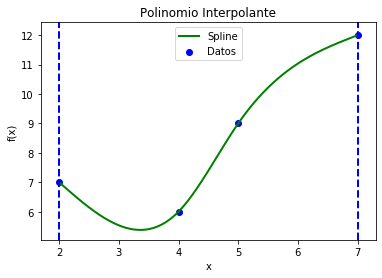

In [9]:
import matplotlib.pyplot as plt

ejex = np.linspace(min(df['x']), max(df['x']),num=1000)
Nx=len(ejex)
y_sp=np.zeros(Nx,dtype='object')

for i in range(0,Nx):
    y_sp[i] = SplinelibrePlot(df,ejex[i])
    
y_spline=pd.to_numeric(y_sp,errors='coerce')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(ejex, y_spline, linewidth=2, color = 'green')
plt.scatter(df['x'], df['y'], color = 'blue')
plt.legend(['Spline','Datos','limite','dato'],fontsize=10)
plt.axvline(min(df['x']), linewidth=2, color='blue',linestyle='dashed')
plt.axvline(max(df['x']), linewidth=2, color='blue',linestyle='dashed')
plt.title('Polinomio Interpolante');

C:\Users\micae\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
C:\Users\micae\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


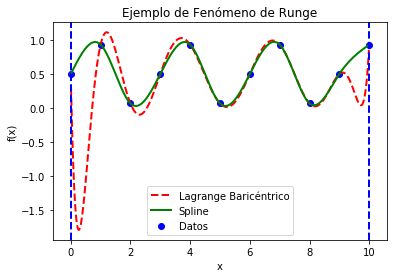

In [10]:
plt.xlabel('x')
plt.ylabel('f(x)')

ejex = np.linspace(min(dfn['x'])*0.9, max(dfn['x'])*1,num=1000)
Nx=len(ejex)
y_spln=np.zeros(Nx,dtype='object')
y_plb=np.zeros(Nx)

for i in range(0,Nx):
    y_plb[i] = LagrangeBaricentricoPlot(dfn,ejex[i]);
for i in range(0,Nx):
    y_spln[i] = SplinelibrePlot(dfn,ejex[i]);

y_splineN=pd.to_numeric(y_spln,errors='coerce')   

plt.plot(ejex, y_plb, linewidth=2, color = 'red',linestyle='dashed')
plt.plot(ejex, y_splineN, linewidth=2, color = 'green')
plt.scatter(dfn['x'], dfn['y'], color = 'blue')
plt.legend(['Lagrange Baricéntrico','Spline','Datos'],fontsize=10)
plt.axvline(min(dfn['x']), linewidth=2, color='blue',linestyle='dashed')
plt.axvline(max(dfn['x']), linewidth=2, color='blue',linestyle='dashed')
plt.title('Ejemplo de Fenómeno de Runge');

![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Gracias por su atención
***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*